In [2]:
import sys
sys.path.append('C:/Users/omerf/OneDrive/Masaüstü/dtmn/env/Lib/site-packages')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv("financials.csv", index_col=0)

In [6]:
df

,Ticker,Gross Profit,ROE,ROA,Current Ratio,Interest Cover,EBITDA/Trevenue,NetDebt/EBITDA,Earnpershare,OpCashflow Ratio,EBIT/Total Revenue,Price Increase(%)
0,ADBE,0.877031,0.211078,0.528679,1.106791,54.642857,0.396229,0.664134,10.183028,0.964321,0.347609,93.802979
1,ADBE,0.881850,0.213665,0.556235,1.250577,51.486726,0.418499,0.707387,9.680532,1.042989,0.368578,-42.905842
2,ADBE,0.866180,0.268696,0.645716,1.477866,37.000000,0.392369,0.932462,7.141431,1.039006,0.333541,49.212911
3,AMD,0.449261,0.020396,0.087889,2.358141,14.454545,0.234482,0.517347,0.773252,0.559743,0.053896,151.540391
4,AMD,0.482475,0.268923,0.368403,2.024292,108.911765,0.253499,0.158665,3.005682,0.830425,0.225326,-45.733025
...,...,...,...,...,...,...,...,...,...,...,...,...
440,XOM,0.234506,0.079116,0.389492,1.044330,33.982049,0.190783,0.903690,4.013094,0.849690,0.116306,89.264469
441,XOM,0.045511,-0.084644,-0.499855,0.796498,-23.942142,0.102389,3.699409,-3.457414,0.260242,-0.155258,61.438893
442,MMM,0.438137,0.195169,0.393314,1.542371,14.835498,0.253732,1.940702,7.260339,0.587105,0.200240,-1.798644
443,MMM,0.468392,0.205862,0.384406,1.704815,15.762295,0.271730,1.905902,8.148020,0.825014,0.217565,-25.982393


In [8]:
df.describe()

,Gross Profit,ROE,ROA,Current Ratio,Interest Cover,EBITDA/Trevenue,NetDebt/EBITDA,Earnpershare,OpCashflow Ratio,EBIT/Total Revenue,Price Increase(%)
count,445.000000,445.000000,445.000000,445.000000,443.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,0.443079,-0.057903,0.253769,1.832793,-2.556215,-0.573258,1.897884,6.272121,0.646427,-0.674733,20.131028
std,0.393691,2.610274,0.636661,1.980237,555.969216,9.918493,24.321645,10.064656,1.010949,10.069377,51.284351
min,-4.713437,-44.318469,-5.631161,0.137193,-11242.250000,-178.392103,-333.542857,-25.108609,-4.179011,-180.961771,-94.026886
25%,0.294344,0.031623,0.078496,0.992277,2.749346,0.118520,0.832430,1.913936,0.273482,0.066539,-8.213046
50%,0.468392,0.089968,0.243842,1.378180,8.453752,0.225112,2.092372,4.396334,0.522720,0.156693,13.686211
75%,0.680188,0.178209,0.399465,1.994672,23.180812,0.382532,4.229974,8.112706,0.844438,0.274921,38.363780
max,1.000000,6.406836,5.609971,27.924125,2056.826087,1.292409,321.494752,78.728398,8.879434,1.080044,524.225356


<Axes: >

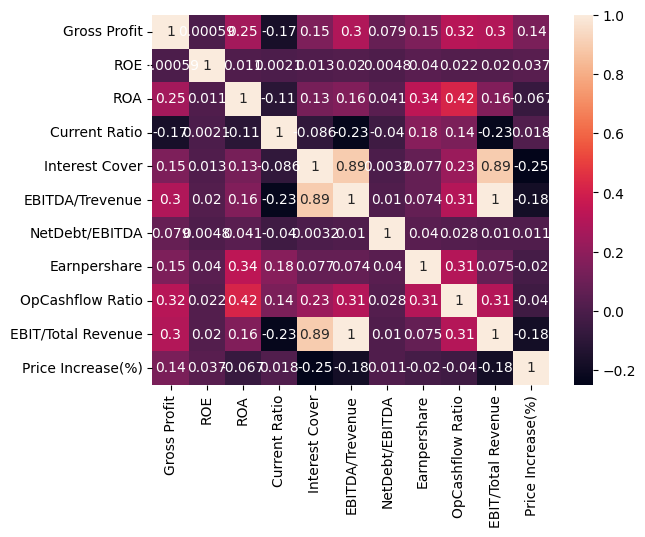

In [86]:
sns.heatmap(df[df.columns[1:]].corr(), annot=True)

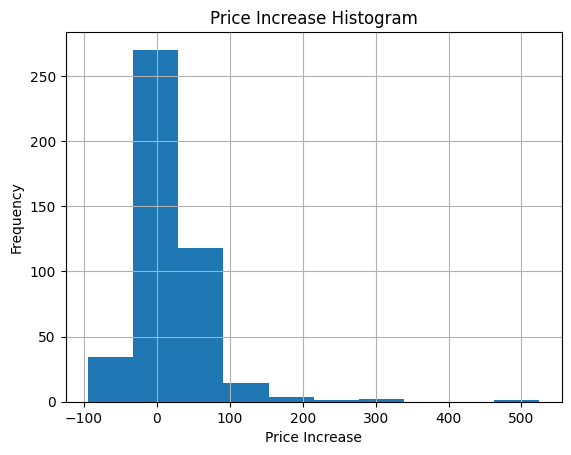

In [84]:
import matplotlib.pyplot as plt
df['Price Increase(%)'].hist()
plt.xlabel('Price Increase')
plt.ylabel('Frequency')
plt.title('Price Increase Histogram')
plt.show()


<Axes: ylabel='Gross Profit'>

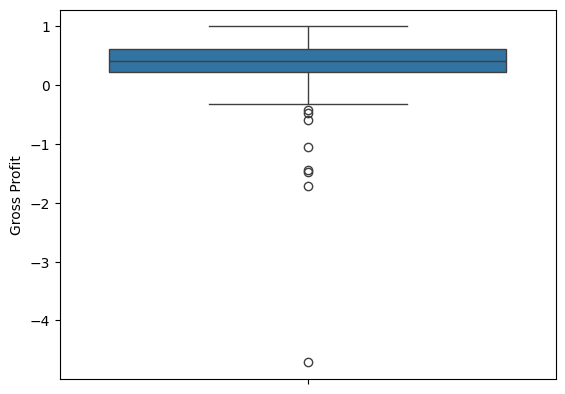

In [76]:
#Outlier detection
sns.boxplot(df["Gross Profit"])

In [34]:
#Outlier detection
df = pd.read_csv("financials.csv", index_col=0)
upper_limit = df["OpCashflow Ratio"].mean()+3*df["OpCashflow Ratio"].std()
lower_limit = df["OpCashflow Ratio"].mean()-3*df["OpCashflow Ratio"].std()
print("upper limit: ",upper_limit)  #Gross Profit: 222,
print("lower limit: ",lower_limit)

upper limit:  3.6530291983573666
lower limit:  -2.3452311322679082


In [35]:
#finding outliers 
df.loc[(df["OpCashflow Ratio"]>upper_limit)| (df["OpCashflow Ratio"]<lower_limit)]


,Ticker,Gross Profit,ROE,Current Ratio,Interest Cover,EBITDA/Trevenue,ROA,NetDebt/EBITDA,Earnpershare,OpCashflow Ratio,EBIT/Total Revenue,Price Increase(%)
161,BBIO,0.955775,0.437229,4.519987,-5.025162,-5.118522,-0.876707,-4.336632,-2.577610,-3.454673,-5.205723,524.225356
162,BBIO,0.955333,0.788556,6.580770,-11.536962,-7.657252,-0.632878,-3.233541,-3.515001,-3.686516,-7.741064,-27.734376
163,BBIO,1.000000,-2.159393,6.720726,-12.790424,-56.658625,-0.698051,-1.060786,-3.742757,-4.179011,-56.835132,-31.237846
182,KRP,0.767311,0.112320,4.006718,10.663482,0.693794,1.257000,1.189600,2.294054,8.879434,0.516954,12.168768
184,KRP,0.414865,-0.408831,3.231601,-38.964778,-2.176645,-5.631161,-0.862160,-6.437676,7.099899,-2.696000,98.444167
197,PSA,0.748239,0.407167,1.506282,33.134919,1.292409,5.609971,1.271183,25.771841,6.056464,1.080044,19.128194
198,PSA,0.730490,0.197187,1.523777,22.724326,0.812749,2.658951,2.692624,11.778253,5.276089,0.603889,-13.589539
199,PSA,0.702421,0.146385,0.652621,25.185402,0.676062,5.269502,1.291371,8.119463,5.176425,0.486270,81.078211
221,LCID,-1.706573,-0.235855,5.239167,-41.622598,-1.787136,-0.265564,-2.160700,-0.695828,-2.374526,-2.093924,-20.541870
223,LCID,0.227867,-0.513219,3.575914,-11242.250000,-178.392103,-1.085765,-0.001382,-0.444517,-3.077433,-180.961771,304.500008


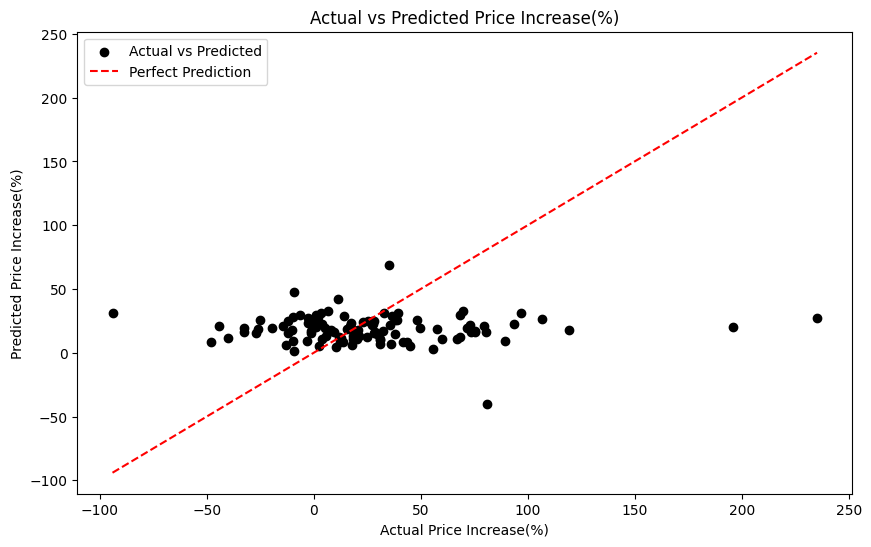

Mean Absolute Error (MAE): 31.552611959631417


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('financials.csv')

df = df.drop(columns=['Ticker'])

df.dropna(inplace=True)

X = df.drop(columns=['Price Increase(%)'])
y = df['Price Increase(%)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred = lr_model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='black', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

plt.xlabel('Actual Price Increase(%)')
plt.ylabel('Predicted Price Increase(%)')
plt.title('Actual vs Predicted Price Increase(%)')
plt.legend()
plt.show()

print("Mean Absolute Error (MAE):", mae)



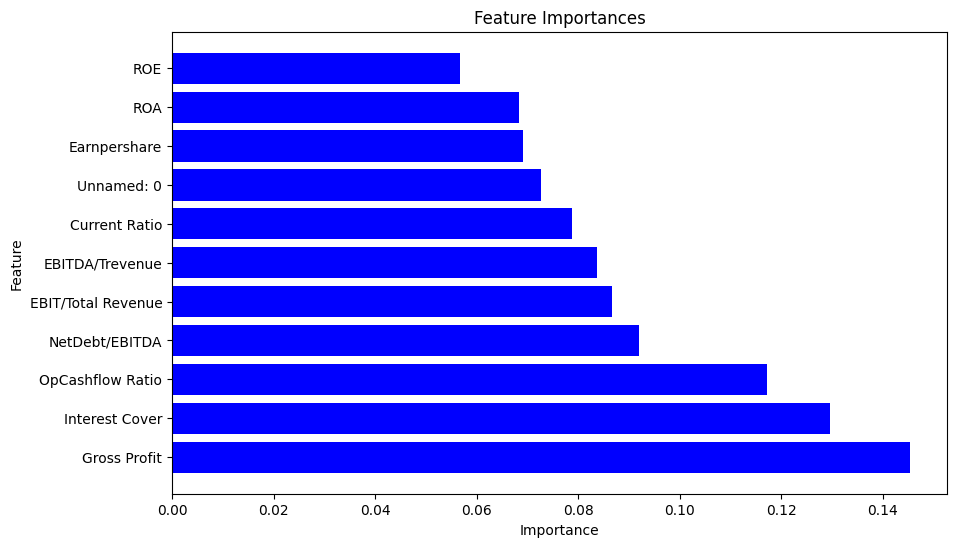

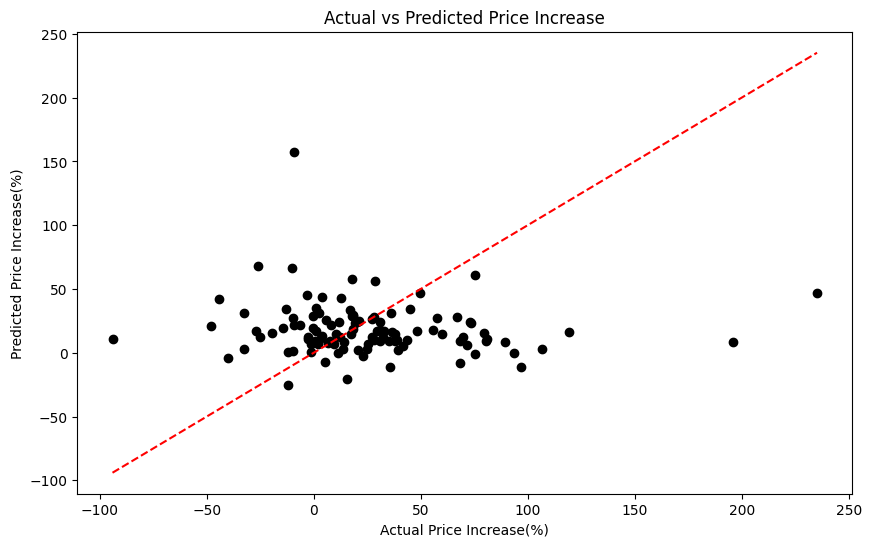

Mean Absolute Error (MAE): 34.91596899427844


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd

df = pd.read_csv('financials.csv') 


df = df.drop(columns=['Ticker'])


df.dropna(inplace=True)

X = df.drop(columns=['Price Increase(%)'])
y = df['Price Increase(%)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)


feature_importances = rf_model.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


num_top_features =4
top_features = feature_importance_df.head(num_top_features)['Feature'].tolist()


X_train_top = X_train[top_features]
X_test_top = X_test[top_features]
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

pca = PCA(n_components=4)  
X_train_pca = pca.fit_transform(X_train_top)
X_test_pca = pca.transform(X_test_top)


rf_model_pca = RandomForestRegressor(random_state=42)
rf_model_pca.fit(X_train_pca, y_train)

y_pred = rf_model_pca.predict(X_test_pca)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price Increase(%)')
plt.ylabel('Predicted Price Increase(%)')
plt.title('Actual vs Predicted Price Increase')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)



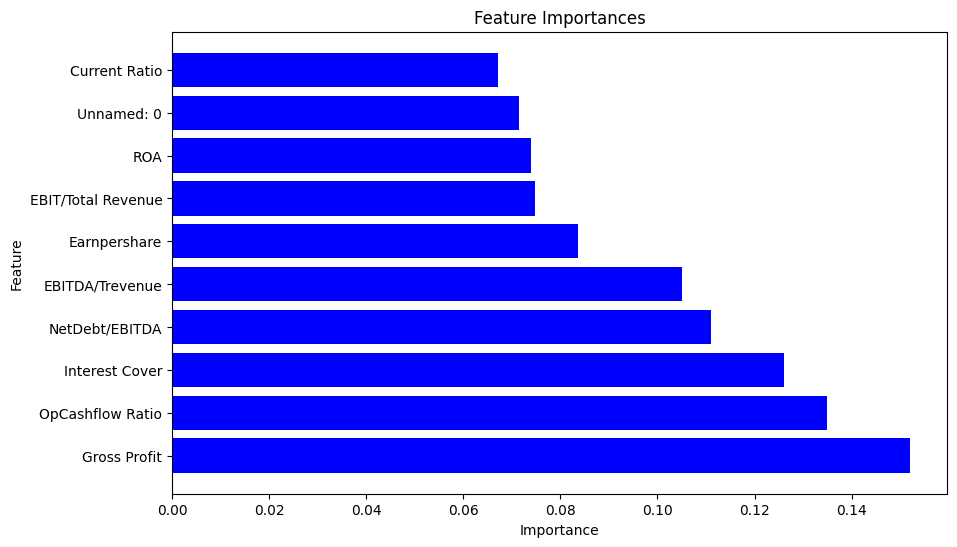

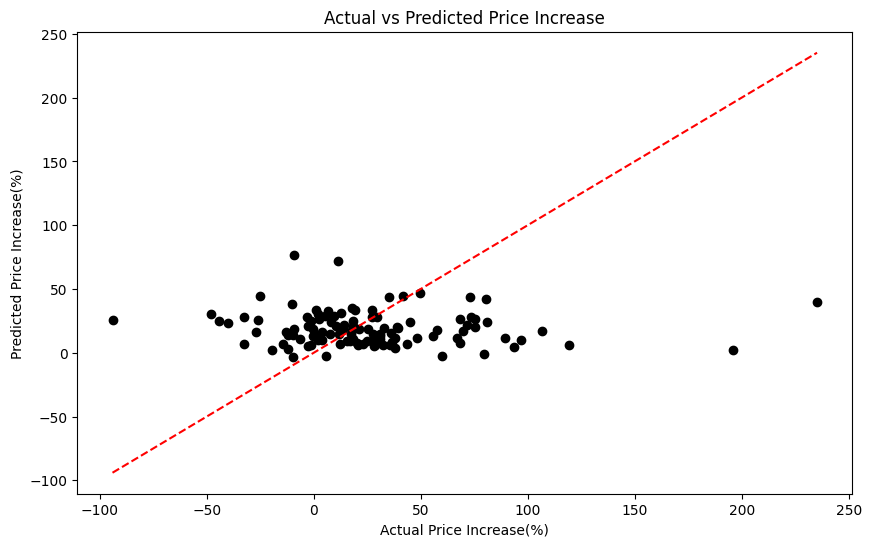

Mean Absolute Error (MAE): 32.52134800463716


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('financials.csv')


df = df.drop(columns=['Ticker','ROE'])

df.dropna(inplace=True)


X = df.drop(columns=['Price Increase(%)'])
y = df['Price Increase(%)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)


feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


pca = PCA(n_components=4) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


rf_model_pca = RandomForestRegressor(random_state=42)
rf_model_pca.fit(X_train_pca, y_train)


y_pred = rf_model_pca.predict(X_test_pca)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price Increase(%)')
plt.ylabel('Predicted Price Increase(%)')
plt.title('Actual vs Predicted Price Increase')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


df = pd.read_csv('financials.csv')  


df = df.drop(columns=['Ticker','ROE'])#  drop ROE gives higher accuracy
df.dropna(inplace=True)

df['Price Increase'] = (df['Price Increase(%)'] >10).astype(int)
df.drop(columns=['Price Increase(%)'], inplace=True)


X = df.drop(columns=['Price Increase'])
y = df['Price Increase']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA(n_components=2)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_pca, y_train)


y_pred = rf_clf.predict(X_test_pca)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5842696629213483
